# Rejection Sampling

In [27]:
# imports
import numpy as np
import scipy

import seaborn as sns
import pandas

from matplotlib import pyplot as plt

from astr234 import plotting

# Gaussian Problem

## Use rejection sampling to take a uniform distribution of random numbers and turn it into a Gaussian distribution

## Define the Gaussian

In [7]:
mean = 0.
sigma = 1.

In [33]:
npulls = 10000000
prob=np.random.uniform(size=npulls)
x=np.random.uniform(low=-100, high=100, size=npulls)
keep =prob < np.exp(-(x-mean)**2/2/sigma**2)/np.sqrt(2*np.pi)/sigma
goodx = x[keep]

## Plot PDF

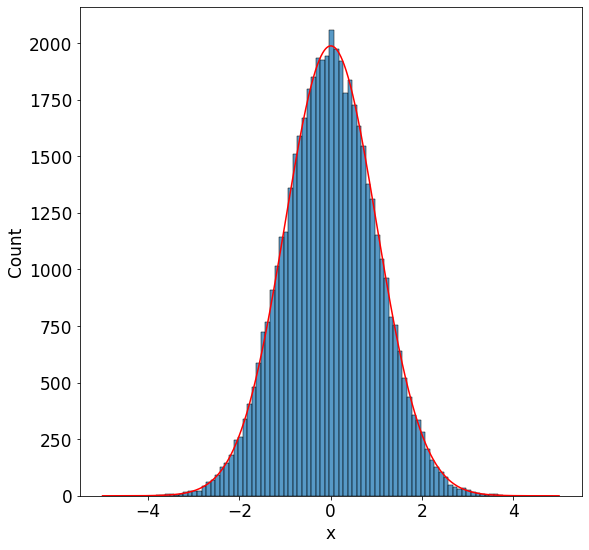

In [35]:
binwidth = 0.1
#
plt.figure(figsize=(9,9))
plt.clf()
ax = plt.gca()
#
sns.histplot(x=goodx, ax=ax, binwidth=binwidth)
# Overplot
xpt = np.linspace(-5., 5., 10000)
ypt = (goodx.size*binwidth) *  np.exp(-(xpt-mean)**2/2/sigma**2)/sigma/np.sqrt(2*np.pi) 
ax.plot(xpt, ypt, color='r')                                                             
# 
ax.set_xlabel('x')
plotting.set_fontsize(ax, 17)

## Plot CDF

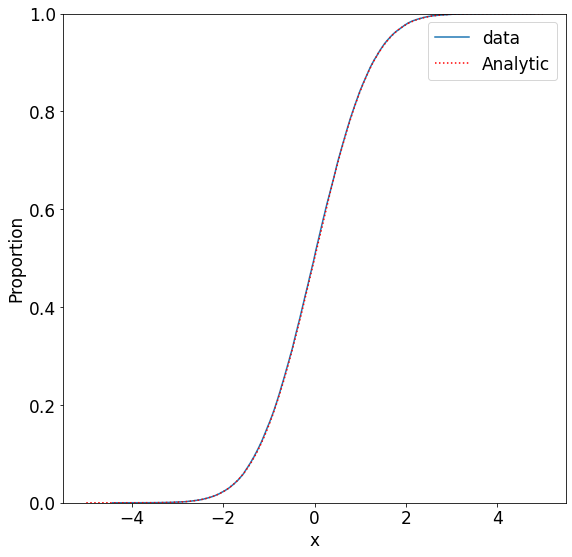

In [45]:
#
plt.figure(figsize=(9,9))
plt.clf()
ax = plt.gca()
#
df = pandas.DataFrame(dict(x=goodx))
sns.ecdfplot(data=df, x='x', ax=ax, label='data')

# Overplot
xpt = np.linspace(-5., 5., 10000)
ypt = scipy.stats.norm.cdf(xpt)
ax.plot(xpt, ypt, 'r:', label='Analytic')                                                             
# 
ax.set_xlabel('x')
ax.legend(fontsize=17)
plotting.set_fontsize(ax, 17)

---- 

# Exponential

In [46]:
ndraws = 10000000
x0 = 1.
prob=np.random.uniform(size=ndraws)
x=np.random.uniform(low=0, high=100, size=ndraws)
keep =prob < np.exp(-x/x0)/x0
goodx = x[keep]

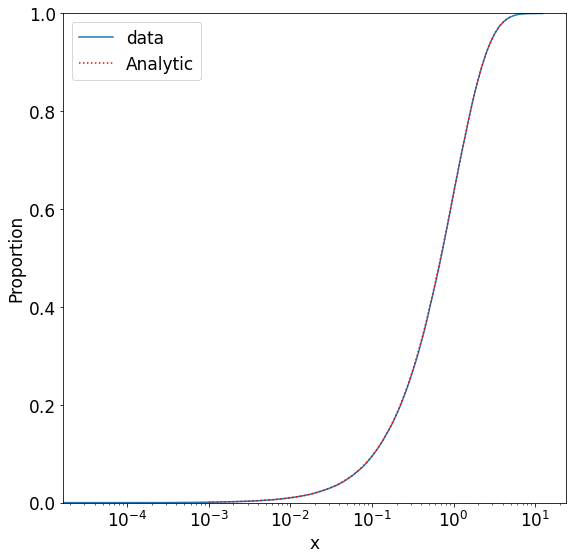

In [52]:
#
plt.figure(figsize=(9,9))
plt.clf()
ax = plt.gca()
#
df = pandas.DataFrame(dict(x=goodx))
sns.ecdfplot(data=df, x='x', ax=ax, label='data', log_scale=(True,False))

# Overplot
xpt = np.linspace(1e-3, 5., 10000)
ypt = scipy.stats.expon.cdf(xpt)
ax.plot(xpt, ypt, 'r:', label='Analytic')                                                             
# 
ax.set_xlabel('x')
ax.legend(fontsize=17)
plotting.set_fontsize(ax, 17)

----